In [2]:
import cairo
from IPython.display import Image, display
from math import pi
from io import BytesIO
import math

# Create synthetic data for GAN. 

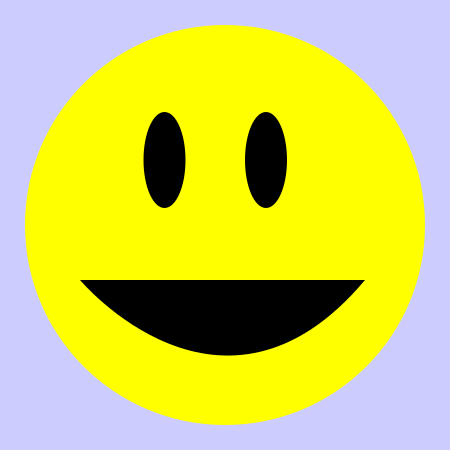

In [17]:
width =450
height = 450

with cairo.SVGSurface('smiley' + ".svg", width, height) as surface:

    # creating a cairo context object
    background = cairo.Context(surface)

    #create background
    background.rectangle(0, 0, width, height)
    background.set_source_rgb(0.8, 0.8, 1)
    background.fill()

    context = cairo.Context(surface)

    #create face
    context.arc(width/2, height/2, 200, 0, 2 * pi)
    context.set_source_rgb(1, 1, 0)
    context.fill()
    
    #draw the curve for the smile
    x1,y1 = 80, 280
    x3,y3 = 365, y1
    x2,y2 = x1+((x3-x1)/2) ,450

    context.curve_to(x1,y1, x2,y2,x3,y3)
    context.set_source_rgb(0,0,0)
    context.close_path()
    context.fill()

    # creating an ellipse for left eye
    context.save()
    context.scale(0.7, 1.6)
    xL = (width/2) +10
    yL = (height/2) -125
    context.arc(xL , yL, 30, 0, 2*math.pi)
    context.set_source_rgba(0, 0, 0, 1)
    context.fill()
    context.restore()

    context.save()
    context.scale(0.7,1.6)
    xR = (width/2) +155
    yR = (height/2) -125

    # creating an ellipse for right eye
    context.arc(xR,  yR, 30, 0, 2*math.pi)
    context.fill()

    # Save as a SVG and PNG
    surface.write_to_png('smiley' +'.png')
    with BytesIO() as fileobj:
        surface.write_to_png(fileobj)
        display(Image(fileobj.getvalue(), width=450))